# Phân lớp chữ viết tay với MNIST

In [33]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow_datasets as tfds # Tải bộ thư viện với pip
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Tải dữ liệu với Bộ datasets

In [15]:
datasets = tfds.load('mnist', shuffle_files=False, as_supervised=False)
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']


In [13]:
buffer_size = 10000
batch_size = 64
num_epochs = 20

In [14]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                  tf.cast(item['label'], tf.int32))
)

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                  tf.cast(item['label'], tf.int32))
)
tf.random.set_seed(1)
mnist_train = mnist_train.shuffle(buffer_size = buffer_size, reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(batch_size)
mnist_train = mnist_train.skip(10000).batch(batch_size)
                                   

## Xây dựng mạng Neural Network

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',
          name='conv_1', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_1'))

In [23]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1), padding='same', name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), name='pool_2'))

In [24]:
model.compute_output_shape(input_shape=(16,28,28,1))

(16, 7, 7, 64)

In [25]:
model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16,28,28,1))

(16, 3136)

In [26]:
model.add(tf.keras.layers.Dense(units=1024, name='fc_1',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10,name='fc_2',activation='softmax'))

In [29]:
tf.random.set_seed(1)
model.build(input_shape=(None,28,28,1))
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = ['sparse_categorical_crossentropy'],
              metrics=['accuracy'])

In [31]:
history = model.fit(mnist_train,epochs = num_epochs, validation_data = mnist_valid, shuffle=True)

Epoch 1/20


2025-06-06 15:32:59.474215: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1749198779.638819   14851 service.cc:152] XLA service 0x7a797c004640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749198779.638844   14851 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-06-06 15:32:59.663768: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749198779.787606   14851 cuda_dnn.cc:529] Loaded cuDNN version 90300


 37/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4922 - loss: 1.5057

I0000 00:00:1749198782.375772   14851 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8959 - loss: 0.3222

2025-06-06 15:33:08.129211: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 4 bytes spill stores, 4 bytes spill loads

2025-06-06 15:33:08.355858: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 4 bytes spill stores, 4 bytes spill loads

2025-06-06 15:33:08.357441: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 4 bytes spill stores, 4 bytes spill loads

2025-06-06 15:33:08.477605: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 896 bytes spill stores, 896 bytes spill loads

2025-06-06 15:33:08.483130: I external/local_xla/xla

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8960 - loss: 0.3219 - val_accuracy: 0.9830 - val_loss: 0.0538
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9860 - loss: 0.0470 - val_accuracy: 0.9880 - val_loss: 0.0406
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9888 - loss: 0.0358 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9906 - val_loss: 0.0377
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9930 - loss: 0.0211 - val_accuracy: 0.9902 - val_loss: 0.0402
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9897 - val_loss: 0.0393
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9895 - val_loss: 0.0449
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9904 - va

Text(0, 0.5, 'Accuracy')

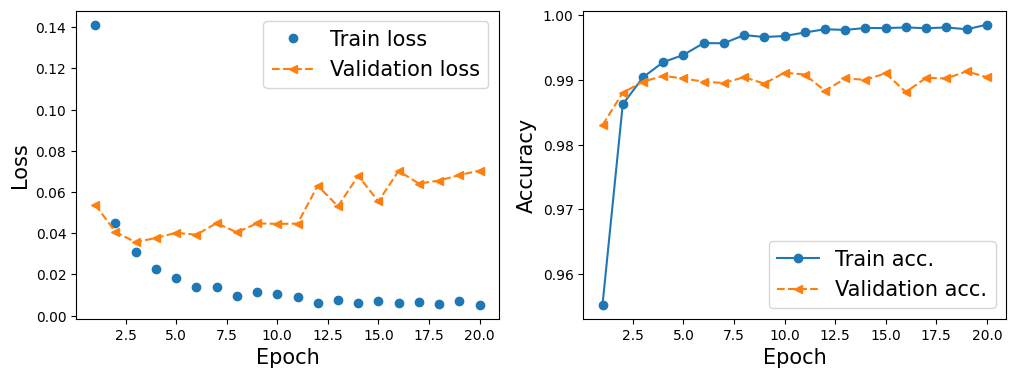

In [36]:
hist = history.history
x_arr = np.arange(len(hist['loss']))+1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist['loss'],'o',label='Train loss')
ax.plot(x_arr,hist['val_loss'],'--<', label='Validation loss')
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Loss',size = 15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist['accuracy'],'-o',label='Train acc.')
ax.plot(x_arr,hist['val_accuracy'],'--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Accuracy',size=15)